#### 先玩个小游戏
https://transcranial.github.io/keras-js/#/densenet121

![CNN](./xxq/6.png)

In [2]:
# -*-coding:utf-8 -*-
###required libararies
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist=input_data.read_data_sets("./MNIST_data",one_hot=False)
train_X,train_Y,test_X,test_Y=mnist.train.images,mnist.train.labels,mnist.test.images,\
mnist.test.labels

Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz


In [3]:
print(test_Y[1],test_Y[59])#change to one_hot coding 

2 5


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout,Convolution2D,MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import RMSprop
nb_classes=10
#drop_prob=0.5
batch_size=128
####因为是卷积神经网络，输入数据的格式是图像格式，所以要进行reshape
train_x=np.reshape(train_X,(train_X.shape[0],28,28,1))
test_x=np.reshape(test_X,(test_X.shape[0],28,28,1))
train_y=np_utils.to_categorical(train_Y,nb_classes)
test_y=np_utils.to_categorical(test_Y,nb_classes)

In [5]:
print(train_y.shape,'\n',test_y.shape)

(55000, 10) 
 (10000, 10)


In [6]:
print(train_x.shape,'\n',test_x.shape)

(55000, 28, 28, 1) 
 (10000, 28, 28, 1)


In [34]:
train_x[:,:,:,0].shape

(55000, 28, 28)

7
3
4
6
1
8
1
0
9
8


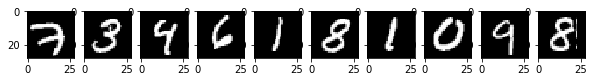

In [74]:
###reshape后的数据显示
import matplotlib.pyplot as plt
%matplotlib inline
f,a=plt.subplots(1,10,figsize=(10,5))
for i in range(10):
    a[i].imshow(train_x[i,:,:,0],cmap='gray')
    print(train_Y[i])
    

In [41]:
?Convolution2D
###Convolution2D(filters, kernel_size, strides=(1, 1),padding='valid',activation=None)

In [42]:
####establish a convolution nerual network
model=Sequential()

####Convolution layer 1
model.add(Convolution2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),strides=(1,1),\
                        padding='same',activation='relu'))

In [43]:
?MaxPooling2D
#MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid')

In [44]:
#####pooling layer with dropout
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Dropout(0.2))

In [45]:
####Convolution layer 2
model.add(Convolution2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',\
                              activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Dropout(0.2))

####Convolution layer 3
model.add(Convolution2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',\
                              activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Flatten())###理解扁平化
model.add(Dropout(0.2))

#model.add(Flatten())?

In [13]:
?Flatten

In [46]:
####fully connected layer 1 (fc layer)
model.add(Dense(output_dim=625,activation='relu'))
model.add(Dropout(0.5))

####fully connected layer 2 (fc layer)
model.add(Dense(output_dim=10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

e:\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=625)`
  
e:\python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=10)`
  


### 从上面的model.summary可见卷积神经网络的参数数目巨大！一个简单的MNIST识别就有81万多的参数个数

In [47]:
model.compile(optimizer=RMSprop(lr=0.001,rho=0.9),loss="categorical_crossentropy",\
             metrics=['accuracy'])
import time
start_time=time.time()
model.fit(train_x,train_y,epochs=30,batch_size=128,verbose=1)
end_time=time.time()
print("running time:%.2f"%(end_time-start_time))

Epoch 1/30
55000/55000 [==============================] - 143s 3ms/step - loss: 0.3391 - acc: 0.8888
Epoch 2/30
55000/55000 [==============================] - 148s 3ms/step - loss: 0.0945 - acc: 0.9705
Epoch 3/30
55000/55000 [==============================] - 147s 3ms/step - loss: 0.0701 - acc: 0.9787
Epoch 4/30
55000/55000 [==============================] - 142s 3ms/step - loss: 0.0600 - acc: 0.9819
Epoch 5/30
55000/55000 [==============================] - 141s 3ms/step - loss: 0.0520 - acc: 0.9839
Epoch 6/30
55000/55000 [==============================] - 141s 3ms/step - loss: 0.0497 - acc: 0.9841
Epoch 7/30
55000/55000 [==============================] - 138s 3ms/step - loss: 0.0426 - acc: 0.9873
Epoch 8/30
55000/55000 [==============================] - 128s 2ms/step - loss: 0.0442 - acc: 0.9868
Epoch 9/30
55000/55000 [==============================] - 135s 2ms/step - loss: 0.0422 - acc: 0.9870
Epoch 10/30
55000/55000 [==============================] - 132s 2ms/step - loss: 0.0394 - a

In [49]:
evaluation=model.evaluate(test_x,test_y,batch_size=128,verbose=1)
print("model loss:%.4f"%(evaluation[0]),"model accuracy:%.4f"%(evaluation[1]))

10000/10000 [==============================] - 7s 681us/step
model loss:0.0664 model accuracy:0.9911


## Utility Methods to understand CNN
+ source: https://github.com/fchollet/keras/issues/431
+ source: https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py

In [50]:
# https://github.com/fchollet/keras/issues/431
def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    import keras.backend as K
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    # Learning phase. 1 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

In [51]:
# https://github.com/philipperemy/keras-visualize-activations/blob/master/read_activations.py
def display_activations(activation_maps):
    import numpy as np
    import matplotlib.pyplot as plt
    """
    (1, 28, 28, 32)
    (1, 14, 14, 32)
    (1, 14, 14, 32)
    (1, 14, 14, 64)
    (1, 7, 7, 64)
    (1, 7, 7, 64)
    (1, 7, 7, 128)
    (1, 3, 3, 128)
    (1, 1152)
    (1, 1152)
    (1, 625)
    (1, 625)
    (1, 10)
    """
    batch_size = activation_maps[0].shape[0]
    assert batch_size == 1, 'One image at a time to visualize.'
    for i, activation_map in enumerate(activation_maps):
        print('Displaying activation map {}'.format(i))
        shape = activation_map.shape
        if len(shape) == 4:
            activations = np.hstack(np.transpose(activation_map[0], (2, 0, 1)))
        elif len(shape) == 2:
            # try to make it square as much as possible. we can skip some activations.
            activations = activation_map[0]
            num_activations = len(activations)
            if num_activations > 1024:  # too hard to display it on the screen.
                square_param = int(np.floor(np.sqrt(num_activations)))
                activations = activations[0: square_param * square_param]
                activations = np.reshape(activations, (square_param, square_param))
            else:
                activations = np.expand_dims(activations, axis=0)
        else:
            raise Exception('len(shape) = 3 has not been implemented.')
        #plt.imshow(activations, interpolation='None', cmap='binary')
        fig, ax = plt.subplots(figsize=(18, 12))
        ax.imshow(activations, interpolation='None', cmap='binary')
        plt.show()

In [75]:
###One image at a time to visualize.
activations = get_activations(model, (test_x[0,:,:,:])[np.newaxis,:])

----- activations -----
(1, 28, 28, 32)
(1, 14, 14, 32)
(1, 14, 14, 32)
(1, 14, 14, 64)
(1, 7, 7, 64)
(1, 7, 7, 64)
(1, 7, 7, 128)
(1, 3, 3, 128)
(1, 1152)
(1, 1152)
(1, 625)
(1, 625)
(1, 10)


In [67]:
(test_x[0,:,:,:])[np.newaxis,:].shape

(1, 28, 28, 1)

Displaying activation map 0


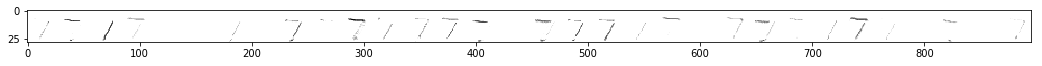

Displaying activation map 1


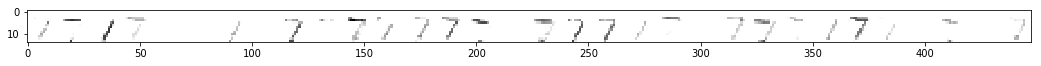

Displaying activation map 2


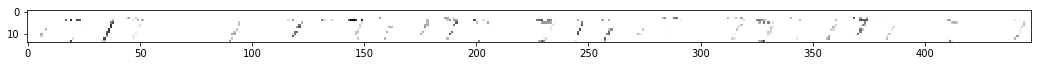

Displaying activation map 3


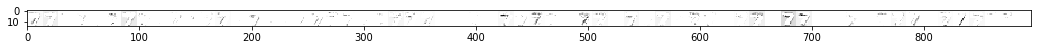

Displaying activation map 4


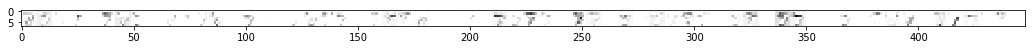

Displaying activation map 5


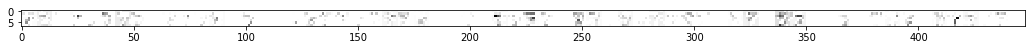

Displaying activation map 6


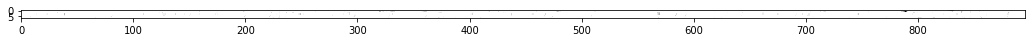

Displaying activation map 7


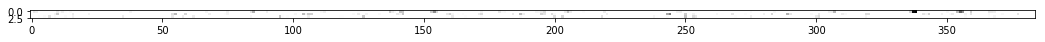

Displaying activation map 8


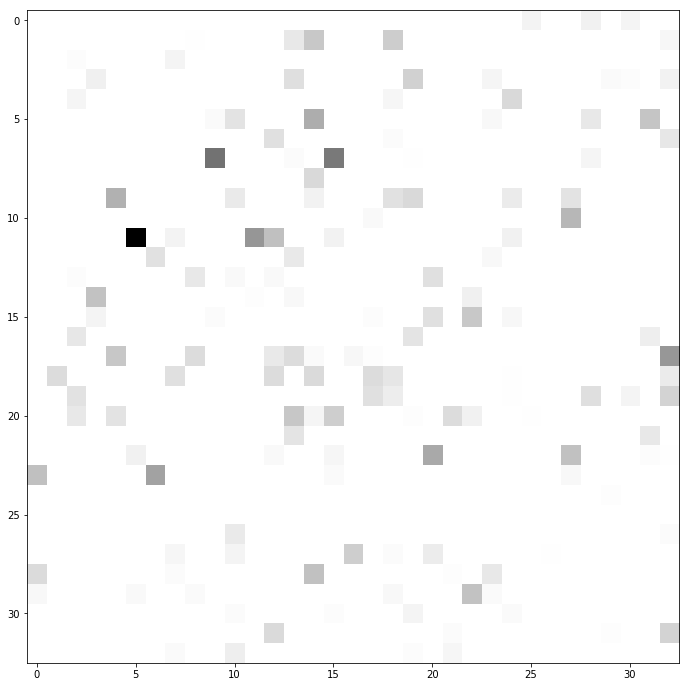

Displaying activation map 9


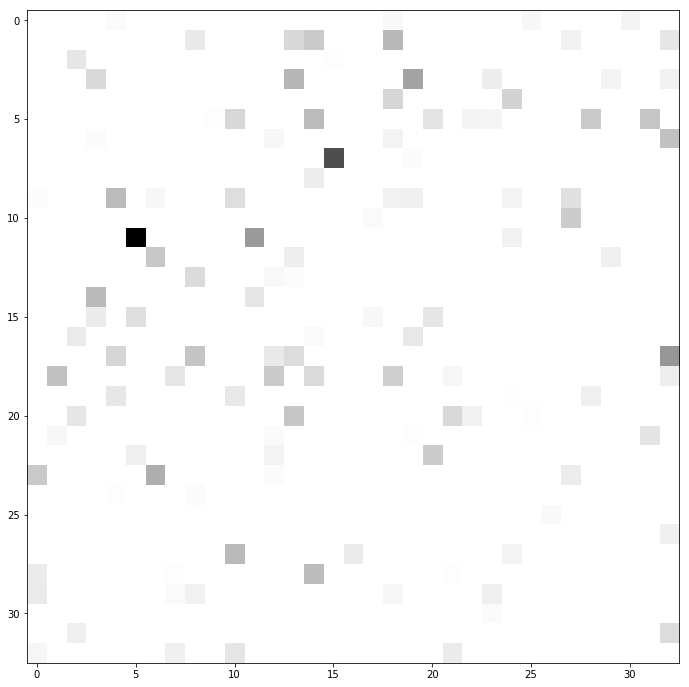

Displaying activation map 10


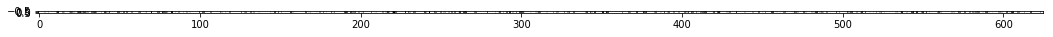

Displaying activation map 11


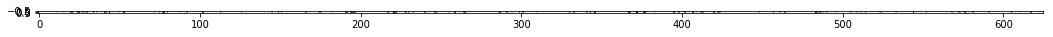

Displaying activation map 12


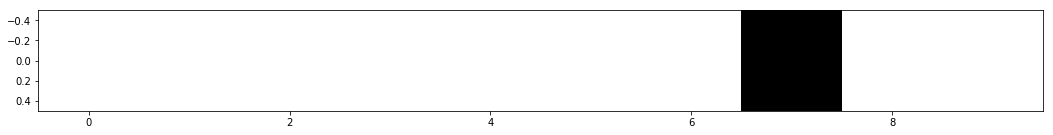

In [76]:
display_activations(activations)

[7]


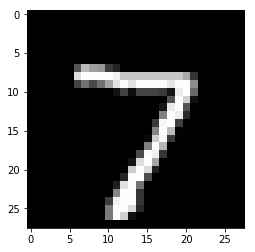

In [77]:
plt.imshow(test_x[0,:,:,0],cmap='gray')
pred_value=model.predict_classes((test_x[0,:,:,:])[np.newaxis,:],batch_size=1)
print(pred_value)